## Stress Scenarios

### Import & Load
***

In [4]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
root = os.environ['HOME']+"/private/pca-yield-curve-analytics/"
sys.path.append(root)

from src.utils import rainbow
import config as conf

In [5]:
df_train = pd.read_csv("../assets/train.csv", index_col="DATE", parse_dates=["DATE"])
df_test  = pd.read_csv("../assets/test.csv", index_col="DATE", parse_dates=["DATE"])

eig_scores_up = pd.read_csv("../assets/stress/eig_scores/up.csv", index_col="DATE", parse_dates=["DATE"])
eig_scores_down = pd.read_csv("../assets/stress/eig_scores/down.csv", index_col="DATE", parse_dates=["DATE"])

In [6]:
pca = joblib.load("../assets/pca_full.joblib")

eig_scores = pca.eig_scores.iloc[:, :pca.k]
components = pca.components[:pca.k]

### Eigen Scores
***

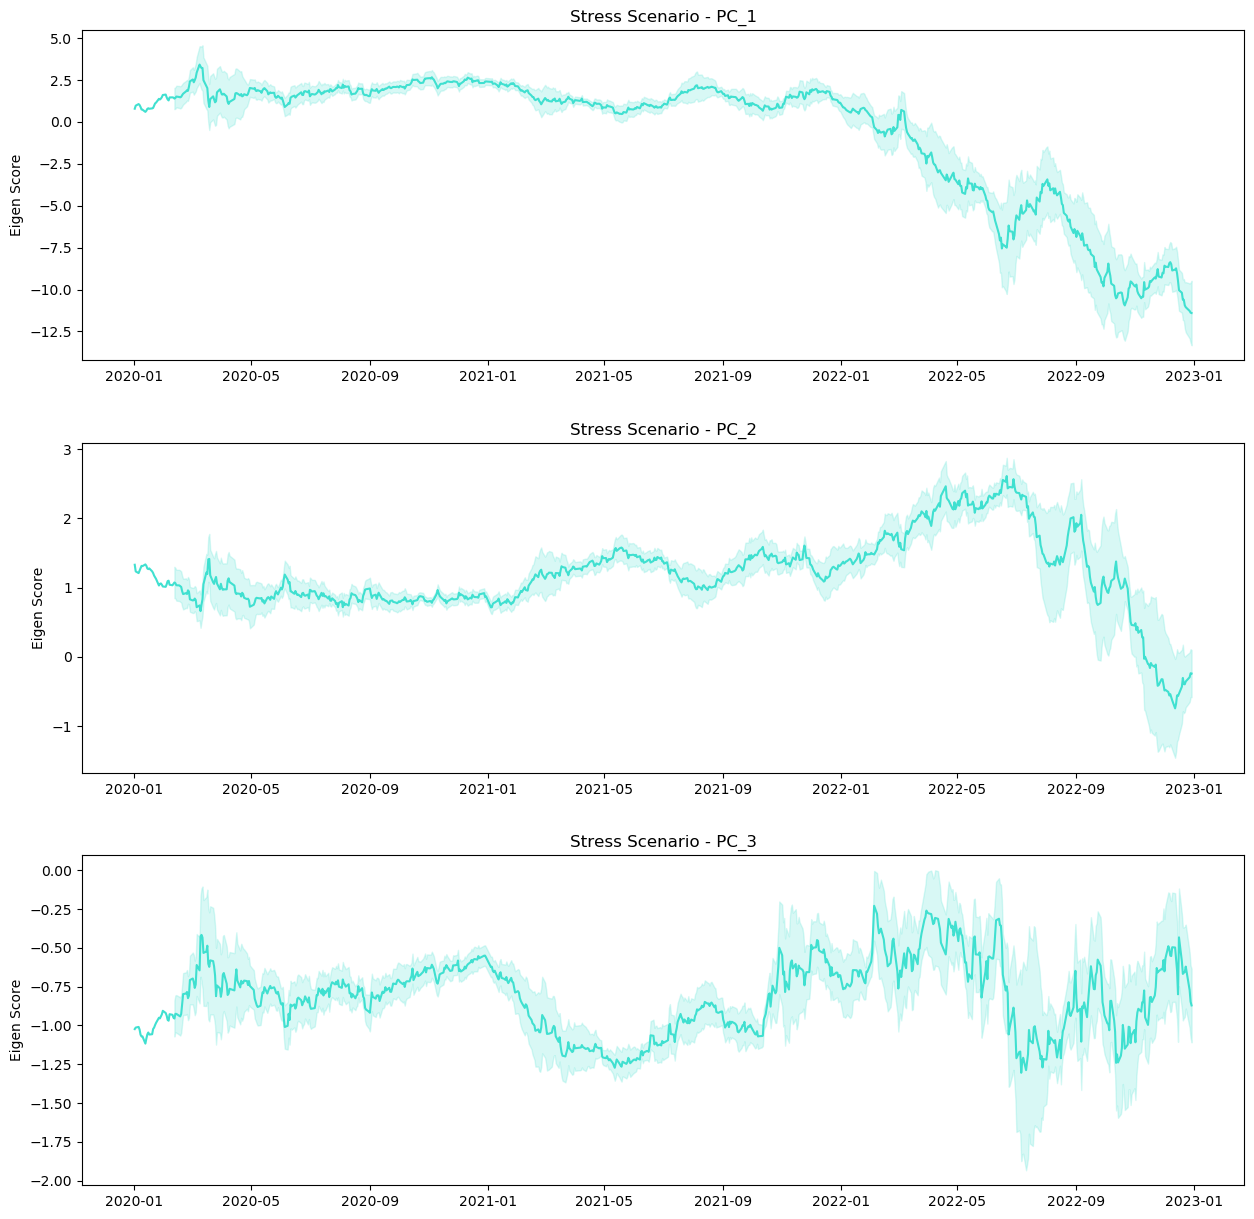

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
color = rainbow(["actual", "up", "down"])

for i,j in enumerate(components):
    ax[i].plot(eig_scores[j], c="turquoise", label="actual", lw=1.5)
    ax[i].fill_between(
        x=eig_scores_down.index, 
        y1=eig_scores_down[j], 
        y2=eig_scores_up[j],
        alpha=0.2,
        color="turquoise"
    )

    ax[i].set_title (f'Stress Scenario - {j}')
    ax[i].set_ylabel ("Eigen Score")
    
plt.subplots_adjust(hspace=0.25)
plt.show()

### Rates
***

In [8]:
stress_up_dic   = {i: pd.read_csv("../assets/stress/rates/"+i+"_up.csv", index_col="DATE") for i in components}
stress_down_dic = {i: pd.read_csv("../assets/stress/rates/"+i+"_down.csv", index_col="DATE") for i in components}

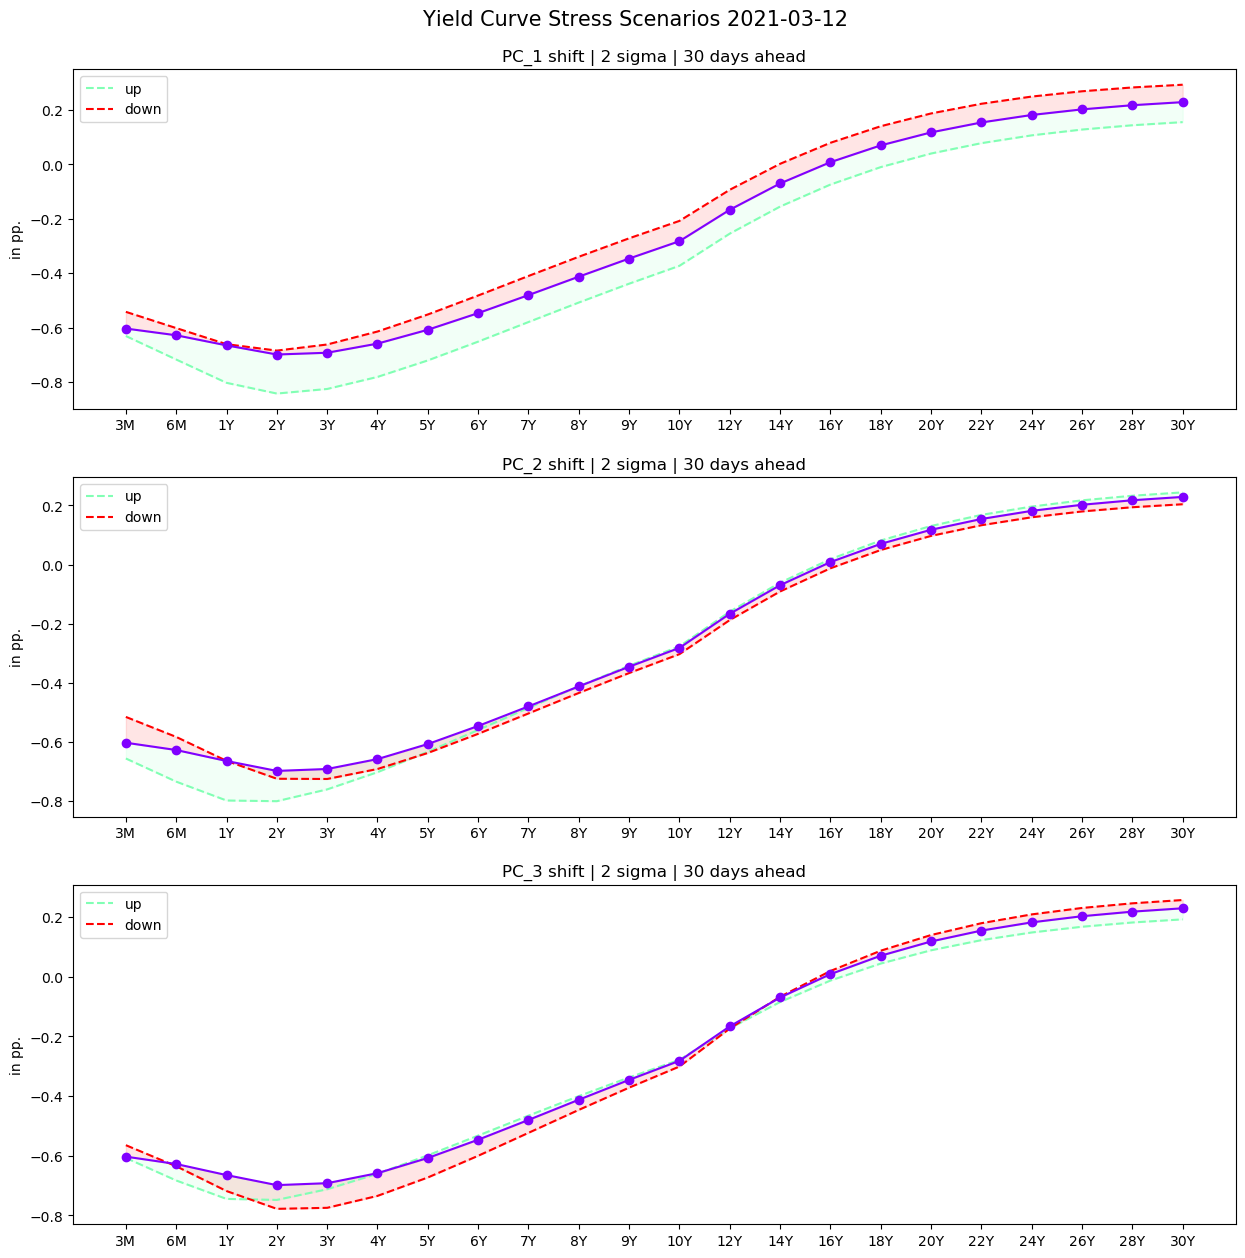

In [12]:
idx = 380
date = df_train.iloc[-idx].name.date().strftime("%Y-%m-%d")

fig, ax = plt.subplots(nrows=pca.k, ncols=1, figsize = (pca.k*5,15))
fig.suptitle("Yield Curve Stress Scenarios "+date, fontsize=15, y=0.92)
color = rainbow(["actual","up","down"])

for i,j in enumerate (components):
    up   = stress_up_dic[j].iloc[-idx]
    down = stress_down_dic[j].iloc[-idx]
    act  = df_train.iloc[-idx]
    
    ax[i].plot(up, label="up", c=color["up"], ls="--")
    ax[i].plot(down, label="down", c=color["down"], ls="--")
    ax[i].plot(act, c=color["actual"], marker="o")
    
    ax[i].fill_between(df_train.columns, up, act, color = color["up"], alpha = 0.1)
    ax[i].fill_between(df_train.columns, down, act, color = color["down"], alpha = 0.1)
    
    ax[i].set_ylabel("in pp.")
    ax[i].set_title("{} shift | {} sigma | {} days ahead".format(j, 2, conf.n_days))
    ax[i].legend()

plt.show()